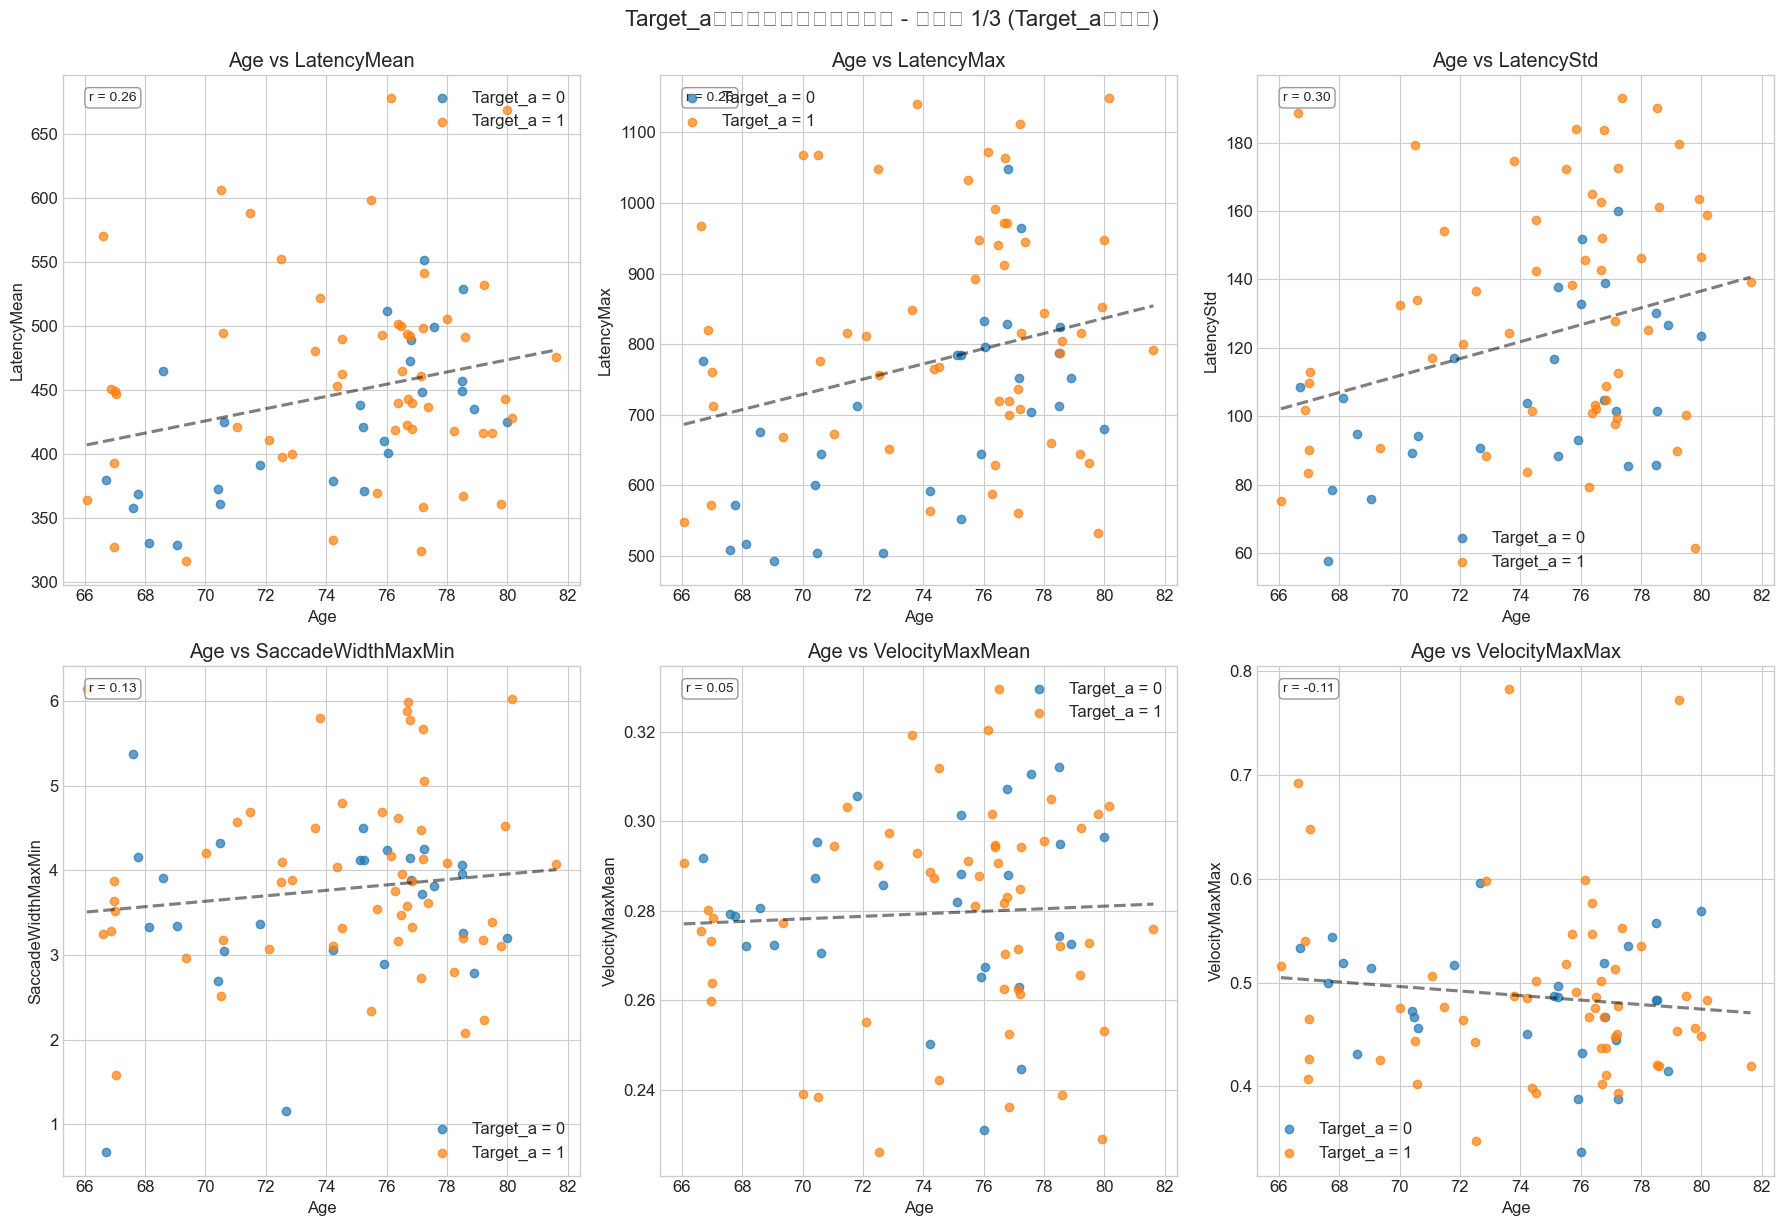

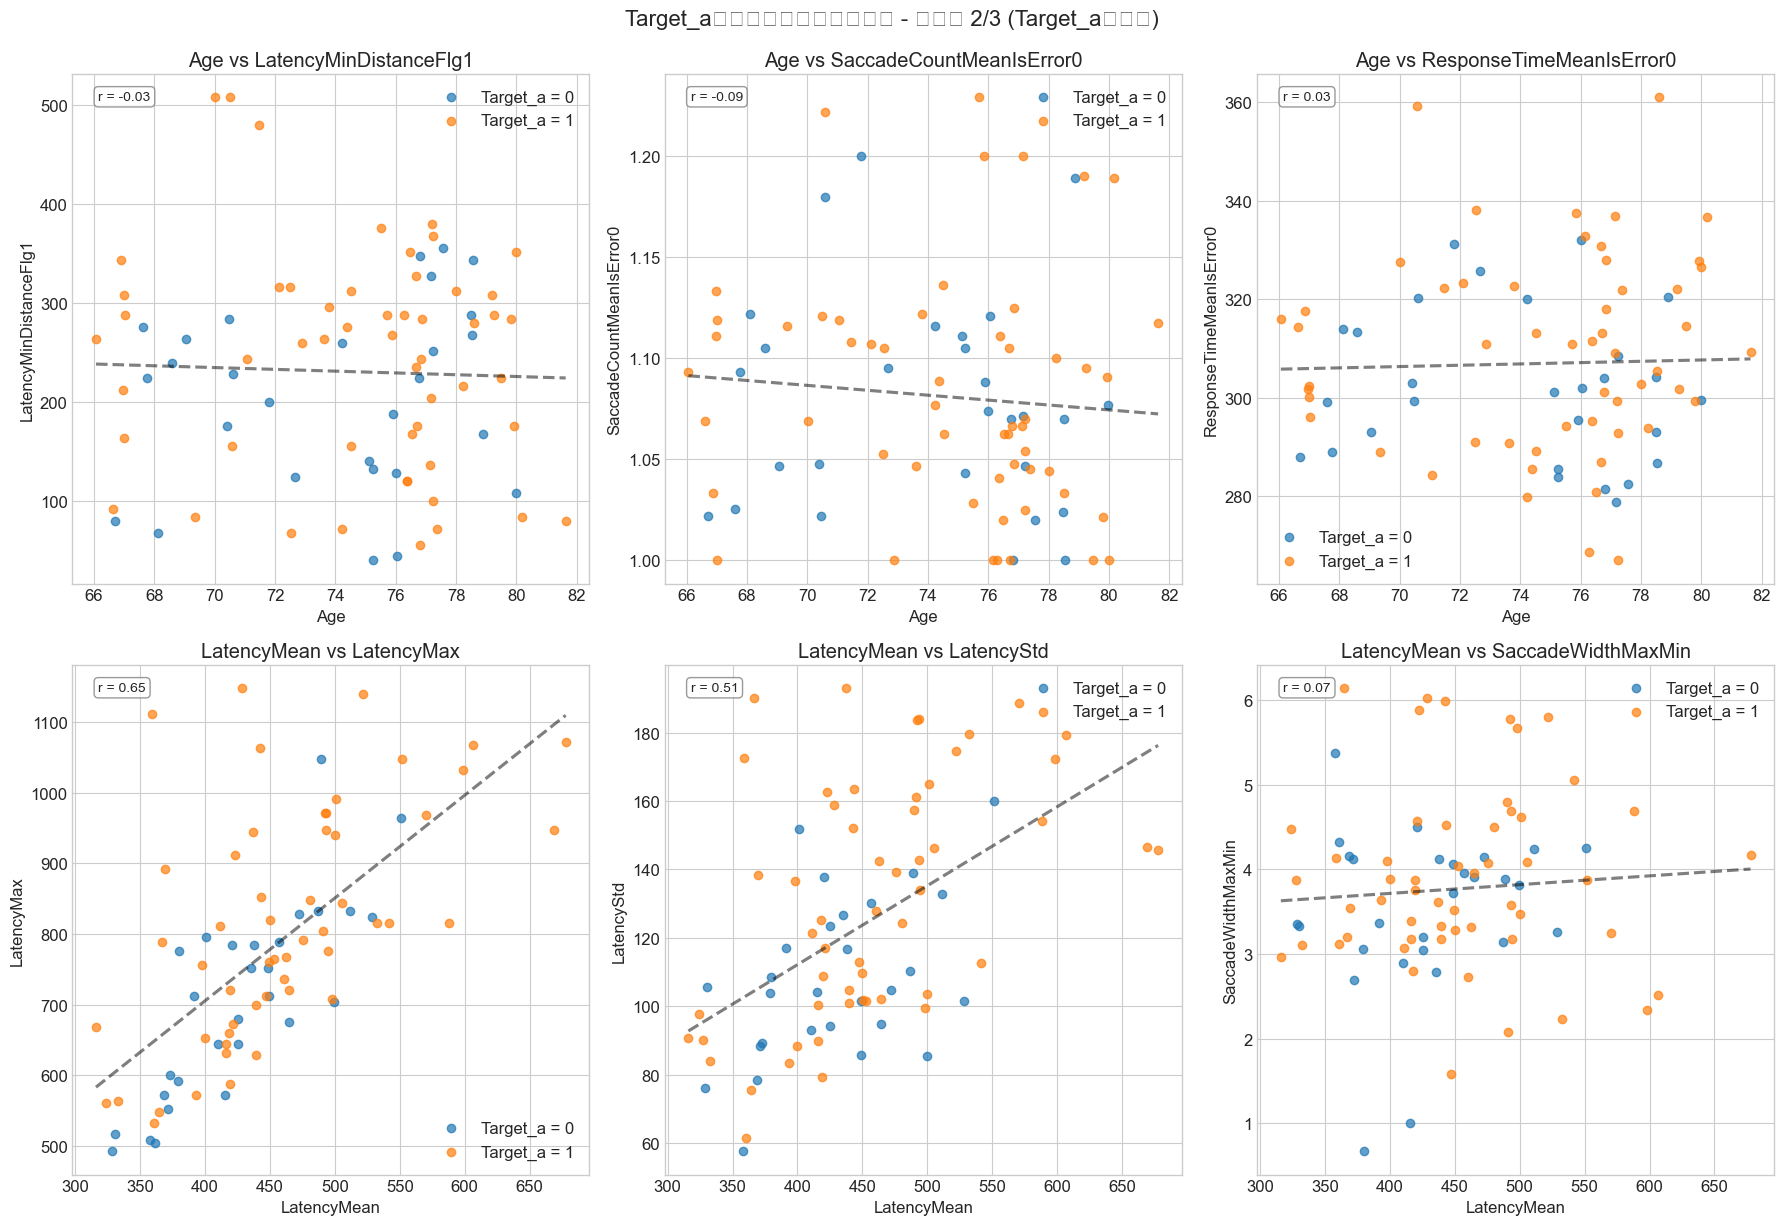

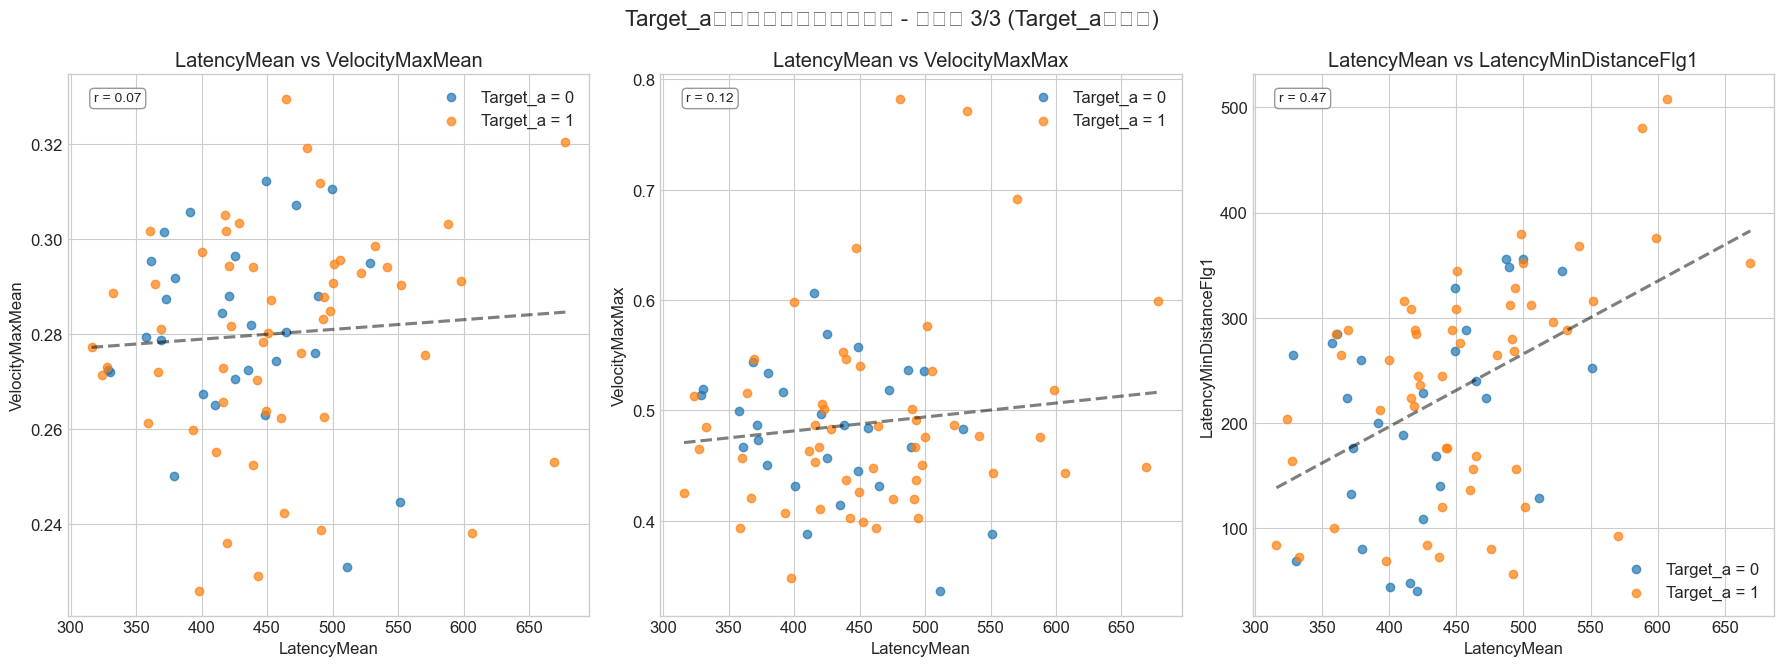

KeyError: 0

<Figure size 2000x1800 with 0 Axes>

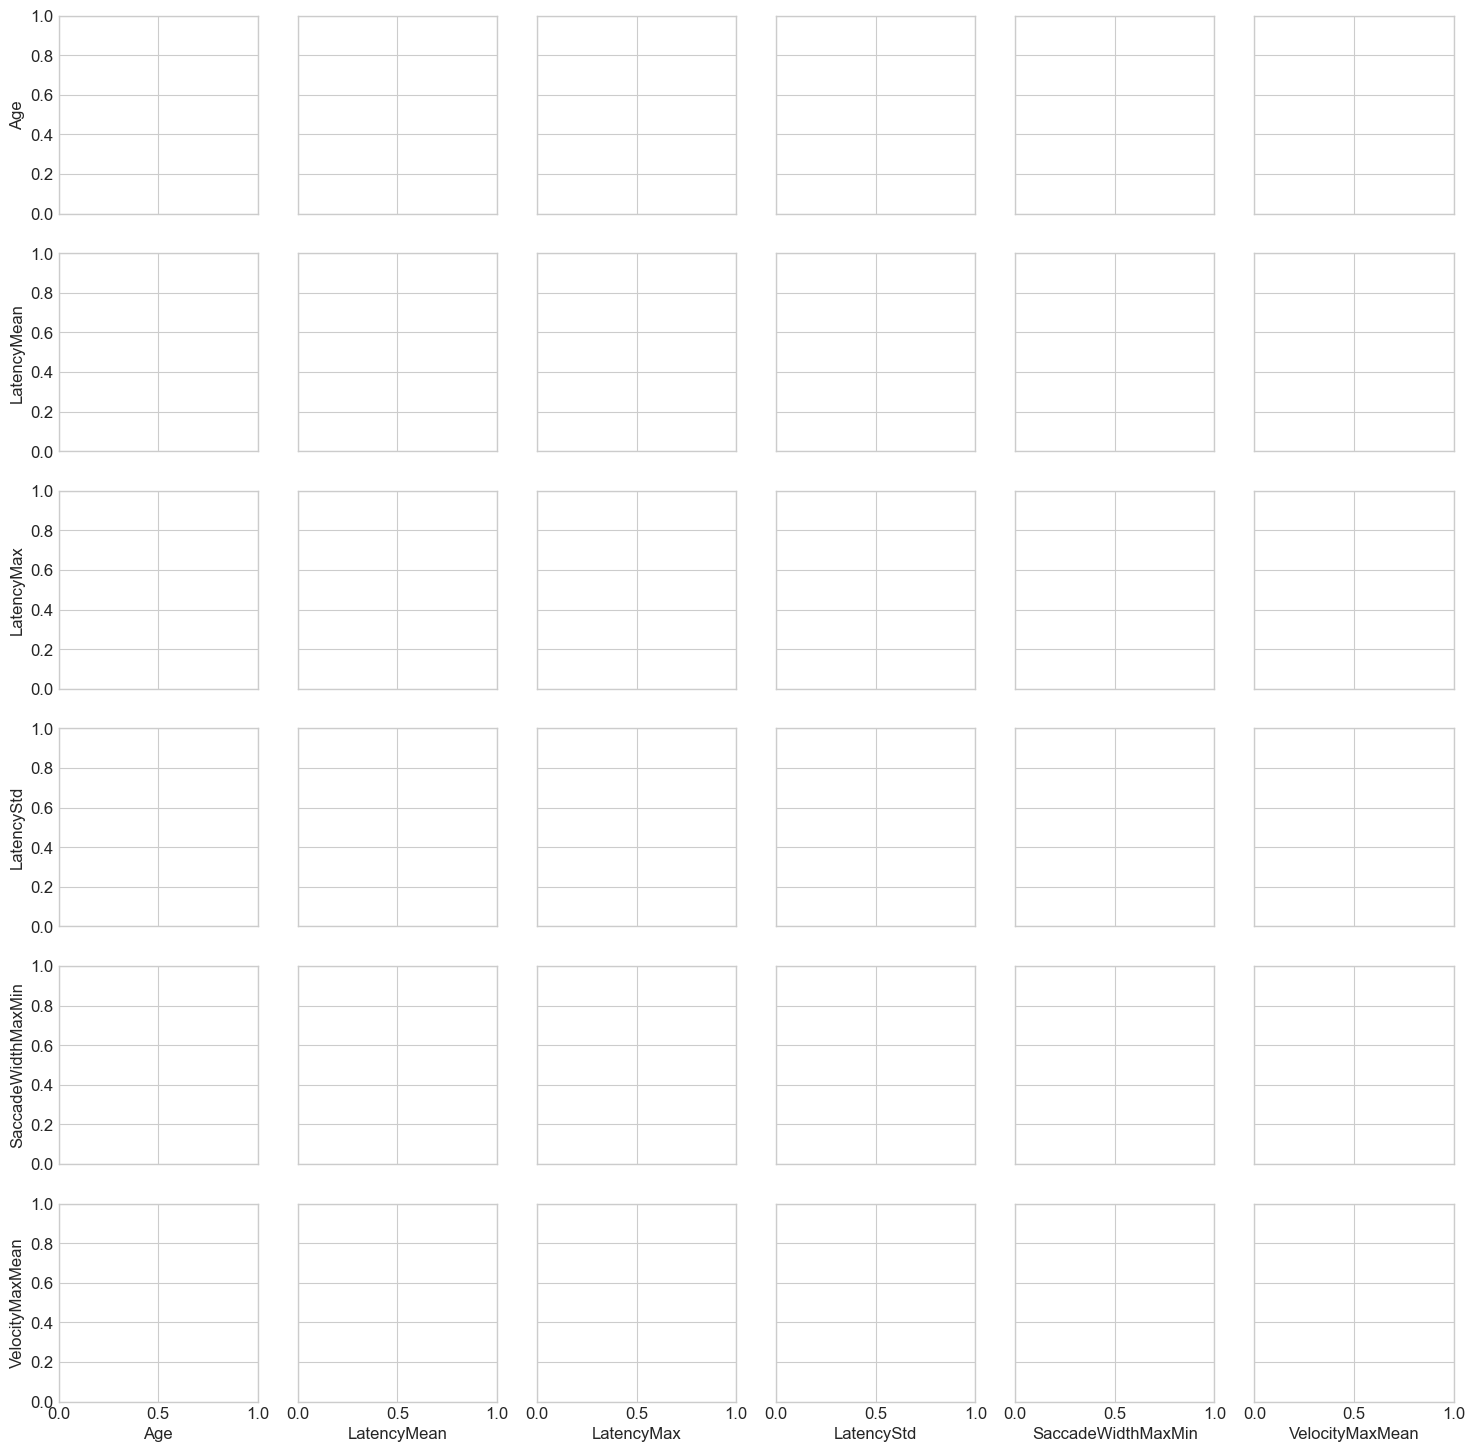

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import itertools
import math
from IPython.display import display, clear_output
import ipywidgets as widgets

# サンプルデータの定義
sample_data = """InspectionDateAndId PublicId EyeSide MoCALabel MoCAlabelstd Age LatencyMean LatencyMax LatencyStd SaccadeWidthMaxMin VelocityMaxMean VelocityMaxMax LatencyMeanIsError0 LatencyMaxIsError0 LatencyStdIsError0 LatencyMaxIsError1 LatencyStdIsError1 ResponseTimeMeanIsError0 ResponseTimeMaxIsError0 ResponseTimeStdIsError0 SaccadeCountMeanIsError0 SaccadeCountStdIsError0 VelocityMaxMeanIsError0 VelocityMaxMaxIsError0 VelocityMaxStdIsError0 VelocityMaxMeanIsError1 GainMinIsError0 LatencyMeanDistanceFlg0 LatencyMaxDistanceFlg0 LatencyMeanDistanceFlg1 LatencyMinDistanceFlg1 LatencyMaxDistanceFlg1 LatencyStdDistanceFlg1 LatencyMeanDistanceFlg2 LatencyMaxDistanceFlg2 LatencyStdDistanceFlg2 ResponseTimeMeanDistanceFlg1 ResponseTimeMeanDistanceFlg2 ResponseTimeMaxDistanceFlg2 ResponseTimeStdDistanceFlg2 SaccadeCountStdDistanceFlg1 SaccadeCountMeanDistanceFlg2 SaccadeWidthMaxMinDistanceFlg2 SaccadeWidthMaxStdDistanceFlg2 SaccadeWidthSumMinDistanceFlg1 SaccadeWidthSumStdDistanceFlg2 VelocityMaxMeanDistanceFlg1 VelocityMaxMaxDistanceFlg1 VelocityMaxMeanDistanceFlg2 VelocityMaxMinDistanceFlg2 GainMinDistanceFlg1 GainMaxDistanceFlg2 GainDiffMinDistanceFlg1 GainDiffStdDistanceFlg1 GainDiffMinDistanceFlg2 AgeGroup Target_a0.0 Target_a0.5 Target_a1.0
20240201100511_20860 A61719131A 2 0 26 77 546.6154 784 109.085 4.40193 0.306353 0.458301 540.8889 784 107.5678 704 120.2759 277.6 408 51.5251 1.044444 0.208409 0.299695 0.448228 0.083095 0.349151 0.73754 529.6 656 558.5263 340 760 96.70308 544.1739 784 130.6514 285.2632 314.4348 468 65.30197 0.229416 1.173913 15.64559 2.719564 11.46299 2.804328 0.291223 0.374109 0.369538 0.242142 0.761436 1.04786 0.000907 0.069447 0.007645 75~79 0 0 2
20240201101327_20862 A61719125A 2 1 18 76 435.8491 688 116.4447 4.252675 0.296814 0.564504 455.3 688 102.8293 684 138.7468 291.1 496 68.39696 1.1 0.303822 0.29359 0.564504 0.101812 0.306737 0.601384 460.3333 568 405.7143 184 684 125.5042 452.8 688 127.212 367.0476 348.4 508 87.40372 0.497613 1.3 6.006126 4.716262 4.690976 4.525864 0.294714 0.516668 0.371297 0.194933 0.601384 1.025313 0.042016 0.120921 0.005713 75~79 1 1 1
20240201101848_20863 A61719142A 2 0 30 66 486.7925 832 110.433 3.13825 0.275963 0.536854 501.625 820 88.25686 832 136.9174 313.125 544 83.31354 1.125 0.336011 0.297991 0.536854 0.088095 0.242395 0.507797 427.3333 600 511.3333 356 820 90.30406 498.6087 832 120.1369 299.1111 412.3478 636 108.0869 0.235702 1.347826 4.167969 5.039498 7.93833 4.864897 0.243531 0.349545 0.337233 0.196669 0.723893 1.07918 0.014168 0.083492 0.008973 ~69 0 0 0
20240201105300_20867 A61719147A 2 1 20 79 465 812 128.1396 4.190885 0.250884 0.460388 467.3333 812 137.1498 640 101.1713 332.1111 584 65.52111 1.055556 0.232311 0.254862 0.460388 0.085026 0.23895 0.217338 470.9091 776 500.5 292 812 145.1427 434.8571 640 114.3758 317 407.619 940 150.3484 0 1.238095 4.965581 4.67054 7.356281 5.310592 0.229699 0.319335 0.308822 0.175419 0.554455 1.019807 0.004703 0.165735 0.011184 80~ 1 1 1
20240201114830_20875 A61719448A 2 1 18 76 306.6061 600 96.09609 2.054801 0.322945 0.627371 319.8333 600 83.24466 496 119.7429 291.6667 540 73.65397 1.25 0.437595 0.30966 0.540868 0.102947 0.35837 0.529583 301.7143 420 308.4444 68 524 104.1498 307.36 600 90.51468 330.5185 354.88 560 99.03885 0.564879 1.56 11.23416 3.932221 9.792426 5.417771 0.325397 0.627371 0.394165 0.256875 0.754712 1.127886 0.012516 0.121781 0.003297 75~79 1 1 1"""

try:
    # CSVファイルのパス - Jupyter環境に合わせて調整
    path = "G:/共有ドライブ/GAP_長寿研/user/iwamoto/視線の動きの俊敏さ/data"
    file_name = "shizuoka2023_0404_a2.0.csv"  # この部分を分析したいファイル名に変更
    file_path = f"{path}/{file_name}"
    
    # CSVファイル読み込み
    df_original = pd.read_csv(file_path)
    print(f"CSVファイルの読み込みに成功しました。行数: {len(df_original)}")
except Exception as e:
    print(f"CSVファイルの読み込みに失敗しました: {e}")
    print("サンプルデータを使用します。")
    # サンプルデータを使用
    df_original = pd.read_csv(io.StringIO(sample_data), sep='\s+')
    print(f"サンプルデータを使用します。行数: {len(df_original)}")

# 除外するカラム
exclude_columns = ['InspectionDateAndId', 'PublicId', 'EyeSide', 'MoCALabel', 'MoCAlabelstd', 'AgeGroup', 'Target_a0.0', 'Target_a0.5','Target_a1.0','Target_a2.0']

# Target_a0.5をラベルとして使用
label_column = 'Target_a1.5'

# Target_a0.5の値を確認
if label_column in df_original.columns:
    all_unique_labels = sorted(df_original[label_column].unique())
    print(f"すべてのTarget_aの値: {all_unique_labels}")
else:
    print(f"'{label_column}'カラムが見つかりません。")
    exit(1)

# ウィジェットを使用してTarget_a0.5=2を含めるかどうかを選択
def process_data(include_value_2=False):
    # データフレームのコピーを作成
    df = df_original.copy()
    
    # データフレームから除外カラムを削除
    for col in exclude_columns:
        if col in df.columns:
            df = df.drop(columns=[col])
    
    # Target_a0.5=2を除外するかどうかを選択
    if not include_value_2 and 2 in all_unique_labels:
        df = df[df[label_column] != 2]
        print("Target_a=2を除外しました。")
    else:
        print("すべてのTarget_aの値を含めて分析します。")
    
    # 現在使用するラベルの種類を確認
    unique_labels = sorted(df[label_column].unique())
    print(f"分析に使用するラベル({label_column})の種類: {unique_labels}")
    
    # 数値型カラムのみを抽出
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    # ラベルカラムを除外
    if label_column in numeric_columns:
        numeric_columns.remove(label_column)
    
    print(f"数値型カラム数: {len(numeric_columns)}")
    print("数値型カラムの一部:")
    print(numeric_columns[:10])  # 最初の10個のカラムを表示
    
    # 図の設定
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = (15, 12)
    plt.rcParams['font.size'] = 12
    
    # カラーマップの設定
    colors = plt.cm.tab10.colors[:len(unique_labels)]
    label_colors = {str(label): colors[i % len(colors)] for i, label in enumerate(unique_labels)}
    
    # 重要な変数を選択（最大10個）
    # よく使われそうなカラムを優先的に使用
    preferred_columns = [
        'Age', 'LatencyMean', 'LatencyMax', 'LatencyStd', 
        'SaccadeWidthMaxMin', 'VelocityMaxMean', 'VelocityMaxMax', 
        'LatencyMinDistanceFlg1', 'SaccadeCountMeanIsError0', 'ResponseTimeMeanIsError0'
    ]
    
    # 優先変数のうち、実際にデータに存在するものを選択
    key_columns = []
    for col in preferred_columns:
        if col in numeric_columns:
            key_columns.append(col)
            # 最大10個まで
            if len(key_columns) >= 10:
                break
    
    # 足りない場合は他の数値カラムから追加
    if len(key_columns) < 10:
        for col in numeric_columns:
            if col not in key_columns:
                key_columns.append(col)
                if len(key_columns) >= 10:
                    break
    
    print(f"散布図に使用する主要変数（{len(key_columns)}個）:")
    print(key_columns)
    
    # 1. 個別の散布図 - 主要変数の組み合わせで散布図を作成（ペアごと）
    # 変数の組み合わせ（最大15組まで）
    var_pairs = list(itertools.combinations(key_columns, 2))[:15]
    
    # 1ページあたりの散布図数 (2行×3列)
    scatter_per_page = 6
    
    # 必要なページ数を計算
    num_pages = math.ceil(len(var_pairs) / scatter_per_page)
    
    print(f"合計 {len(var_pairs)} 組の変数ペアを {num_pages} ページに分けて散布図を表示します。")
    
    # ページごとに散布図を作成
    for page in range(num_pages):
        # 現在のページの変数ペアを取得
        start_idx = page * scatter_per_page
        end_idx = min((page + 1) * scatter_per_page, len(var_pairs))
        current_pairs = var_pairs[start_idx:end_idx]
        
        # 2x3のサブプロットを作成
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        # 各変数ペアについて散布図を描画
        for i, (x_var, y_var) in enumerate(current_pairs):
            if i >= len(axes):
                break
            
            # 極端な外れ値を除外（上下1%）
            x_lower = df[x_var].quantile(0.01)
            x_upper = df[x_var].quantile(0.99)
            y_lower = df[y_var].quantile(0.01)
            y_upper = df[y_var].quantile(0.99)
            
            filtered_df = df[
                (df[x_var] >= x_lower) & (df[x_var] <= x_upper) &
                (df[y_var] >= y_lower) & (df[y_var] <= y_upper)
            ]
            
            # Target_a0.5で色分けして散布図を描画
            for j, label in enumerate(unique_labels):
                subset = filtered_df[filtered_df[label_column] == label]
                if len(subset) > 0:
                    axes[i].scatter(
                        subset[x_var], 
                        subset[y_var], 
                        c=colors[j % len(colors)], 
                        alpha=0.7,
                        label=f'Target_a = {label}'
                    )
            
            # 回帰直線を追加
            sns.regplot(
                x=x_var, 
                y=y_var, 
                data=filtered_df, 
                scatter=False, 
                ci=None,
                color='black',
                line_kws={'linestyle': '--', 'alpha': 0.5},
                ax=axes[i]
            )
            
            # 相関係数を計算して表示
            corr = filtered_df[[x_var, y_var]].corr().iloc[0, 1]
            axes[i].annotate(f'r = {corr:.2f}', 
                             xy=(0.05, 0.95), 
                             xycoords='axes fraction', 
                             fontsize=10, 
                             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
            
            # グラフの設定
            axes[i].set_title(f'{x_var} vs {y_var}')
            axes[i].set_xlabel(x_var)
            axes[i].set_ylabel(y_var)
            axes[i].legend()
        
        # 残りのサブプロットを削除
        if len(current_pairs) < len(axes):
            for i in range(len(current_pairs), len(axes)):
                fig.delaxes(axes[i])
        
        plt.tight_layout()
        include_text = "含む" if include_value_2 else "除外"
        plt.suptitle(f"Target_a別の散布図（ペアごと） - ページ {page+1}/{num_pages} (Target_aを{include_text})", fontsize=16, y=1.02)
        plt.show()
    
    # 2. ペアプロット - 主要変数間の散布図行列（最大6変数まで）
    if len(key_columns) > 6:
        pair_plot_columns = key_columns[:6]  # 最初の6変数のみ
    else:
        pair_plot_columns = key_columns
    
    # ラベル列を含めてペアプロットを作成
    print("主要変数間のペアプロット（最大6変数）:")
    pair_df = df[pair_plot_columns + [label_column]].copy()
    # Target_a0.5列をカテゴリ型に変換
    pair_df[label_column] = pair_df[label_column].astype('category')
    
    plt.figure(figsize=(20, 18))
    pair_plot = sns.pairplot(
        pair_df, 
        hue=label_column,
        palette={str(label): colors[i % len(colors)] for i, label in enumerate(unique_labels)},
        plot_kws={'alpha': 0.6, 's': 50},  # s=マーカーサイズ
        diag_kind='kde',  # 対角線上にKDE（カーネル密度推定）を表示
        height=3
    )
    
    # タイトルを追加
    plt.subplots_adjust(top=0.95)
    include_text = "含む" if include_value_2 else "除外"
    pair_plot.fig.suptitle(f"Target_a0.5別の主要変数ペアプロット (Target_a=2を{include_text})", fontsize=20)
    plt.show()
    
    # 3. 3D散布図 - 3つの主要変数を使用した3D散布図
    if len(key_columns) >= 3:
        from mpl_toolkits.mplot3d import Axes3D
        
        # 最初の3つの変数を使用
        x_var, y_var, z_var = key_columns[:3]
        
        # 極端な外れ値を除外
        x_lower = df[x_var].quantile(0.01)
        x_upper = df[x_var].quantile(0.99)
        y_lower = df[y_var].quantile(0.01)
        y_upper = df[y_var].quantile(0.99)
        z_lower = df[z_var].quantile(0.01)
        z_upper = df[z_var].quantile(0.99)
        
        filtered_df = df[
            (df[x_var] >= x_lower) & (df[x_var] <= x_upper) &
            (df[y_var] >= y_lower) & (df[y_var] <= y_upper) &
            (df[z_var] >= z_lower) & (df[z_var] <= z_upper)
        ]
        
        # 3D散布図
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        # Target_a0.5で色分けして散布図を描画
        for j, label in enumerate(unique_labels):
            subset = filtered_df[filtered_df[label_column] == label]
            if len(subset) > 0:
                ax.scatter(
                    subset[x_var], 
                    subset[y_var], 
                    subset[z_var],
                    c=colors[j % len(colors)], 
                    alpha=0.7,
                    label=f'Target_a = {label}'
                )
        
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)
        ax.set_zlabel(z_var)
        include_text = "含む" if include_value_2 else "除外"
        ax.set_title(f"3D散布図: {x_var} vs {y_var} vs {z_var} (Target_a=2を{include_text})")
        ax.legend()
        
        plt.tight_layout()
        plt.show()
    
    # 4. 相関行列ヒートマップ - Target_a0.5の値ごとに
    for label in unique_labels:
        subset = df[df[label_column] == label]
        
        # 数値型カラムの相関行列を計算
        corr_matrix = subset[key_columns].corr()
        
        # ヒートマップの作成
        plt.figure(figsize=(14, 12))
        sns.heatmap(
            corr_matrix, 
            annot=True,  # 値を表示
            cmap='coolwarm',  # 色マップ
            vmin=-1, vmax=1,  # 値の範囲
            center=0,  # 中心値
            square=True,  # 正方形のセル
            linewidths=.5,  # セル間の線幅
            fmt=".2f",  # 表示する値の書式
            cbar_kws={"shrink": .8}  # カラーバーの設定
        )
        include_text = "含む" if include_value_2 else "除外"
        plt.title(f"Target_a0.5 = {label}の相関行列ヒートマップ (Target_a=2を{include_text})", fontsize=16)
        plt.tight_layout()
        plt.show()

# ウィジェットを作成
include_2_checkbox = widgets.Checkbox(
    value=False,
    description='Target_a=2を含める',
    disabled=False,
    indent=False
)

# ボタンを作成
run_button = widgets.Button(description="分析を実行")

# ボタンクリック時のイベントハンドラ
def on_button_clicked(b):
    clear_output()
    print(f"Target_a=2を{'含める' if include_2_checkbox.value else '除外する'}設定で分析を実行します...")
    process_data(include_value_2=include_2_checkbox.value)

run_button.on_click(on_button_clicked)

# ウィジェットを表示
display(include_2_checkbox)
display(run_button)